This is a project performed as part of the Purdue and IBM Data Science and Generative AI Bootcamp in 2025.

AAL is a well-known brand in Australia, particularly recognized for its clothing business. It has opened branches in various states, metropolises, and tier-1 and tier-2 cities across the country. The brand caters to all age groups, from kids to the elderly. Currently experiencing a surge in business, AAL is actively pursuing expansion opportunities. To facilitate informed investment decisions, the following data analysis was performed.  The report analyzes sales data from the fourth quarter, 2020 only, and it analyzes sales in terms of the following: by state, by consumer group, by time of day, by week, by month, and by quarter.  The report concludes with findings from the analysis in addition to recommendations for further action.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sales=pd.read_csv('/content/drive/MyDrive/Data Projects/Purdue - Sales Analysis/AusApparalSales4thQrt2020.csv')

In [ ]:
#### importing the packages:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sales.head() #first 5 entries in the dataset or earliest dates

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [ ]:
sales.tail() #last 5 entries in the dataset or latest dates

,Date,Time,State,Group,Unit,Sales
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500
7559,30-Dec-2020,Evening,TAS,Seniors,13,32500


In [ ]:
sales.shape #shows (number of rows, number of columns)

(7560, 6)

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [ ]:
Missing_value_pct=((sales.isna().sum())//(sales.shape[0]))*100
Missing_value_pct # shows percentage of missing values in each column

,0
Date,0
Time,0
State,0
Group,0
Unit,0
Sales,0


In [ ]:
sales.duplicated().sum() #shows number of duplicate entries

np.int64(0)

If the missing value percentage is less than 10%, then drop the rows with missing values using dropna function.
If the missing value percentage is between 10% and 70%, then impute the missing value to prevent data loss using mean, median, or mode.
If the missing value percentage is greater than 70% then drop columns with missing values.

Execute the preferred normalization data wrangling method and present the resulting data.

In [ ]:
sales.describe() # generates descriptive statistics for sales dataset

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [ ]:
#### unique categories in the categorical variables:
print(sales.Group.value_counts()) # calculates total sales per customer group: Kids, Men, Women, Seniors

Group
Kids       1890
Men        1890
Women      1890
Seniors    1890
Name: count, dtype: int64


In [ ]:
print(sales.State.value_counts()) # calculates total sales per state

State
WA     1080
NT     1080
SA     1080
VIC    1080
QLD    1080
NSW    1080
TAS    1080
Name: count, dtype: int64


In [ ]:
print(sales.Time.value_counts()) # total sales in the morning, afternoon, and evenings

Time
Morning      2520
Afternoon    2520
Evening      2520
Name: count, dtype: int64


In [ ]:
print(sales.Date.value_counts()) # calculates total sales per date

Date
1-Oct-2020     84
2-Oct-2020     84
3-Oct-2020     84
4-Oct-2020     84
5-Oct-2020     84
               ..
26-Dec-2020    84
27-Dec-2020    84
28-Dec-2020    84
29-Dec-2020    84
30-Dec-2020    84
Name: count, Length: 90, dtype: int64


In [ ]:
sales.Date.nunique() # number of unique dates

90

In [ ]:
90*84 # number of total rows in the dataset

7560

Each date in Q4 (Oct - Dec) has 84 rows of data featuring a combinations of times, states, groups, and units sold.
We have 90 unique dates and there are 7560 total rows in the dataset.

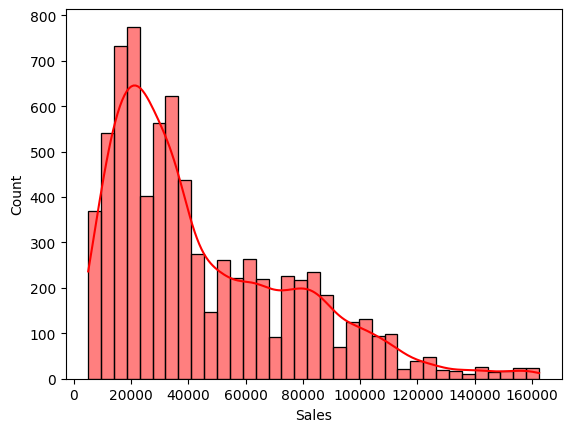

In [ ]:
## univariate analysis:
sns.histplot(x='Sales',kde=True,color='red',data=sales)
plt.show() # plot histogram of sales data

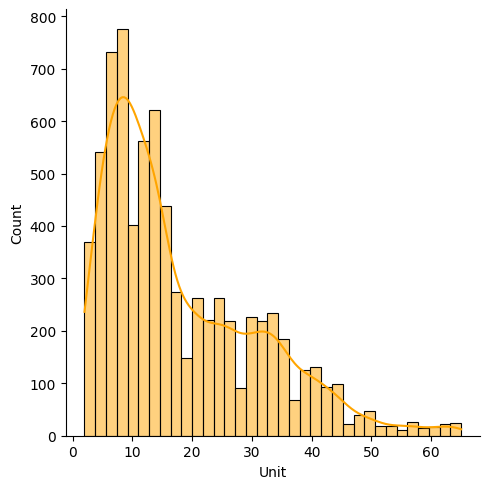

In [ ]:
sns.displot(x='Unit',kde=True,color='orange',data=sales)
plt.show() # plot histogram of unit data

In [ ]:
sales1=sales.copy()
sales2=sales.copy() #makes 2 copies of sales dataset

In [ ]:
#### data wrangling by data standardization - :
sales1['Unit']=(sales1['Unit']-sales1['Unit'].mean())/sales1['Unit'].std()
sales1['Sales']=(sales1['Sales']-sales1['Sales'].mean())/sales1['Sales'].std()

In [ ]:
sales1.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,-0.775530,-0.775530
1,1-Oct-2020,Morning,WA,Men,-0.775530,-0.775530
2,1-Oct-2020,Morning,WA,Women,-1.085574,-1.085574
3,1-Oct-2020,Morning,WA,Seniors,-0.232953,-0.232953
4,1-Oct-2020,Afternoon,WA,Kids,-1.163085,-1.163085


In [ ]:
#### Normalization-: approach 1 (manual computation)
sales2['Unit']=(sales2['Unit']-sales2['Unit'].min())/(sales2['Unit'].max() - sales2['Unit'].min())
sales2['Sales']=(sales2['Sales']-sales2['Sales'].min())/(sales2['Sales'].max()-sales2['Sales'].min())

In [ ]:
sales2.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,0.095238,0.095238
1,1-Oct-2020,Morning,WA,Men,0.095238,0.095238
2,1-Oct-2020,Morning,WA,Women,0.031746,0.031746
3,1-Oct-2020,Morning,WA,Seniors,0.206349,0.206349
4,1-Oct-2020,Afternoon,WA,Kids,0.015873,0.015873


In [ ]:
sales3=sales[['Unit','Sales']]
sales3

,Unit,Sales
0,8,20000
1,8,20000
2,4,10000
3,15,37500
4,3,7500
...,...,...
7555,14,35000
7556,15,37500
7557,15,37500
7558,11,27500


In [ ]:
#### normalization - 2nd approach (using inbuilt method)
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()

In [ ]:
normalized_data=minmax.fit_transform(sales3)
normalized_data ## showing normalized sales data in terms of (units, sales)

array([[0.0952381 , 0.0952381 ],
       [0.0952381 , 0.0952381 ],
       [0.03174603, 0.03174603],
       ...,
       [0.20634921, 0.20634921],
       [0.14285714, 0.14285714],
       [0.17460317, 0.17460317]])

In [ ]:
highest_sales_group=sales.groupby(['Group']).sum('Sales').idxmax()
highest_sales_value=sales.groupby(['Group']).sum('Sales').max()
print(highest_sales_group)
print(highest_sales_value)

Unit      Men
Sales     Men
dtype: object
Unit        34300
Sales    85750000
dtype: int64


In [ ]:
lowest_sales_group=sales.groupby(['Group']).sum('Sales').idxmin()
lowest_sales_value=sales.groupby(['Group']).sum('Sales').min()
print(lowest_sales_group)
print(lowest_sales_value)

Unit      Seniors
Sales     Seniors
dtype: object
Unit        33615
Sales    84037500
dtype: int64


Men record highest sales, while Seniors record lowest sales.

In [ ]:
#### highest and lowest sales by state:
highest_sales_state=sales.groupby(['State']).sum('Sales').idxmax()
highest_sales_value2=sales.groupby(['State']).sum('Sales').max()
print(highest_sales_state)
print(highest_sales_value2)

Unit      VIC
Sales     VIC
dtype: object
Unit         42226
Sales    105565000
dtype: int64


In [ ]:
lowest_sales_state=sales.groupby(['State']).sum('Sales').idxmin()
lowest_sales_value3=sales.groupby(['State']).sum('Sales').min()
print(lowest_sales_state)
print(lowest_sales_value3)

Unit      WA
Sales     WA
dtype: object
Unit         8861
Sales    22152500
dtype: int64


The state, VIC has the highest sales, while Washington state has the lowest sales.

In [ ]:
Revenue_by_state=sales.groupby('State')['Sales'].sum().sort_values(ascending=False)
Revenue_by_state ## States with highest Revenue sorted from highest revenue to minimum revenue

,Sales
State,
VIC,105565000
NSW,74970000
SA,58857500
QLD,33417500
TAS,22760000
NT,22580000
WA,22152500


In [ ]:
sales3.mean()

,0
Unit,18.005423
Sales,45013.558201


In [ ]:
sales3.median()

,0
Unit,14.0
Sales,35000.0


In [ ]:
sales['Date']=pd.to_datetime(sales['Date'])
print(sales.Date.dtypes)
print(sales.head(2))

datetime64[ns]
        Date      Time State  Group  Unit  Sales
0 2020-10-01   Morning    WA   Kids     8  20000
1 2020-10-01   Morning    WA    Men     8  20000


In [ ]:
import warnings
warnings.filterwarnings('ignore')

df_unit_sales=sales.groupby(by='Date',axis='index').sum(numeric_only=True)
df_unit_sales

,Unit,Sales
Date,,
2020-10-01,1488,3720000
2020-10-02,1486,3715000
2020-10-03,1556,3890000
2020-10-04,1488,3720000
2020-10-05,1545,3862500
...,...,...
2020-12-26,1886,4715000
2020-12-27,1855,4637500
2020-12-28,1838,4595000


In [ ]:
df_oct=df_unit_sales.loc['2020-10-01':'2020-10-30']
df_oct

,Unit,Sales
Date,,
2020-10-01,1488,3720000
2020-10-02,1486,3715000
2020-10-03,1556,3890000
2020-10-04,1488,3720000
2020-10-05,1545,3862500
2020-10-06,1584,3960000
2020-10-07,1485,3712500
2020-10-08,1578,3945000
2020-10-09,1458,3645000


In [ ]:
df_nov=df_unit_sales.loc['2020-11-01':'2020-11-30']
df_nov

,Unit,Sales
Date,,
2020-11-01,1208,3020000
2020-11-02,1090,2725000
2020-11-03,1151,2877500
2020-11-04,1257,3142500
2020-11-05,1230,3075000
2020-11-06,1134,2835000
2020-11-07,1200,3000000
2020-11-08,1284,3210000
2020-11-09,1170,2925000


In [ ]:
df_dec=df_unit_sales.loc['2020-12-01':'2020-12-30']
df_dec

,Unit,Sales
Date,,
2020-12-01,1786,4465000
2020-12-02,1826,4565000
2020-12-03,1783,4457500
2020-12-04,1793,4482500
2020-12-05,1823,4557500
2020-12-06,1624,4060000
2020-12-07,1692,4230000
2020-12-08,1832,4580000
2020-12-09,1862,4655000


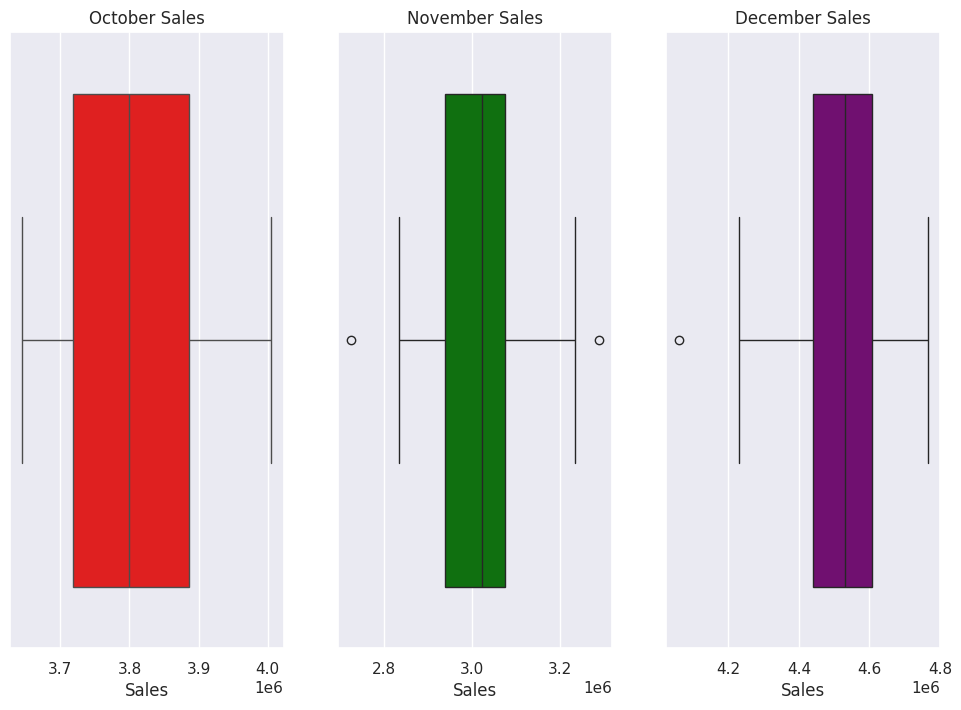

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})

fig,axes=plt.subplots(1,3)

bp_oct=sns.boxplot(x='Sales',data=df_oct,ax=axes[0],color='red')
bp_nov=sns.boxplot(x='Sales',data=df_nov,ax=axes[1],color='green')
bp_dec=sns.boxplot(x='Sales',data=df_dec,ax=axes[2],color='purple')

bp_oct.set(title='October Sales')
bp_nov.set(title='November Sales')
bp_dec.set(title='December Sales')

plt.show()

The boxplots show that October sales were moderately spread around zero with a balanced distribution, suggesting stable but mixed performance. November sales were consistently negative, indicating a poor sales month or high returns. In contrast, December sales were significantly higher and tightly clustered around a strong positive median, likely due to holiday-driven demand

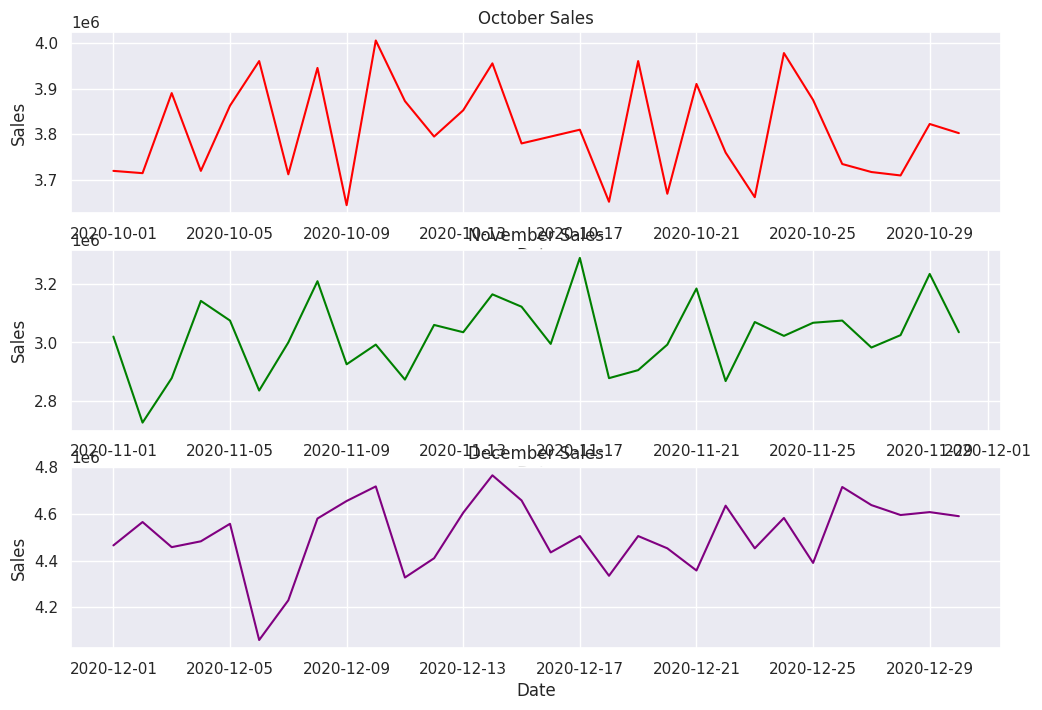

In [ ]:
# line plots -:
sns.set(rc={'figure.figsize':(12,8)})

fig,axes=plt.subplots(3,1)

lp_oct=sns.lineplot(x=df_oct.index,y='Sales', data=df_oct, ax=axes[0],color='red')
lp_nov=sns.lineplot(x=df_nov.index, y='Sales', data=df_nov, ax=axes[1],color='green')
lp_dec=sns.lineplot(x=df_dec.index,y='Sales', data=df_dec, ax=axes[2],color='purple')

lp_oct.set(title='October Sales')
lp_nov.set(title='November Sales')
lp_dec.set(title='December Sales')

plt.show()

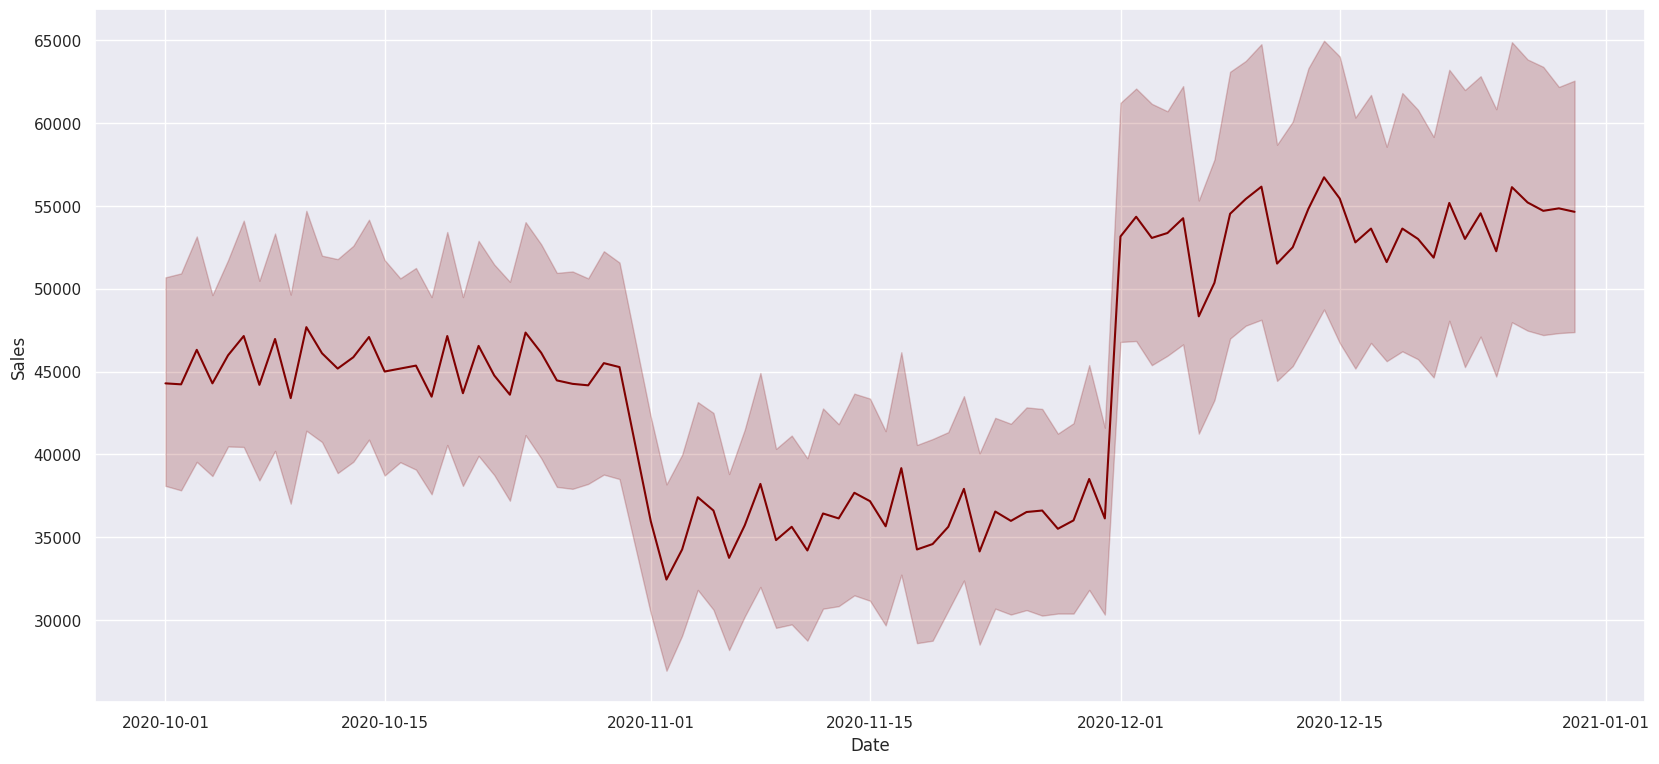

In [ ]:
sns.set(rc={'figure.figsize':(20,9)})
sns.lineplot(x='Date',y='Sales', data=sales, color='maroon')
plt.show()

In [ ]:
weekly_data=sales.resample('W', on='Date')['Sales'].sum()
weekly_data

,Sales
Date,
2020-10-04,15045000
2020-10-11,27002500
2020-10-18,26640000
2020-10-25,26815000
2020-11-01,21807500
2020-11-08,20865000
2020-11-15,21172500
2020-11-22,21112500
2020-11-29,21477500


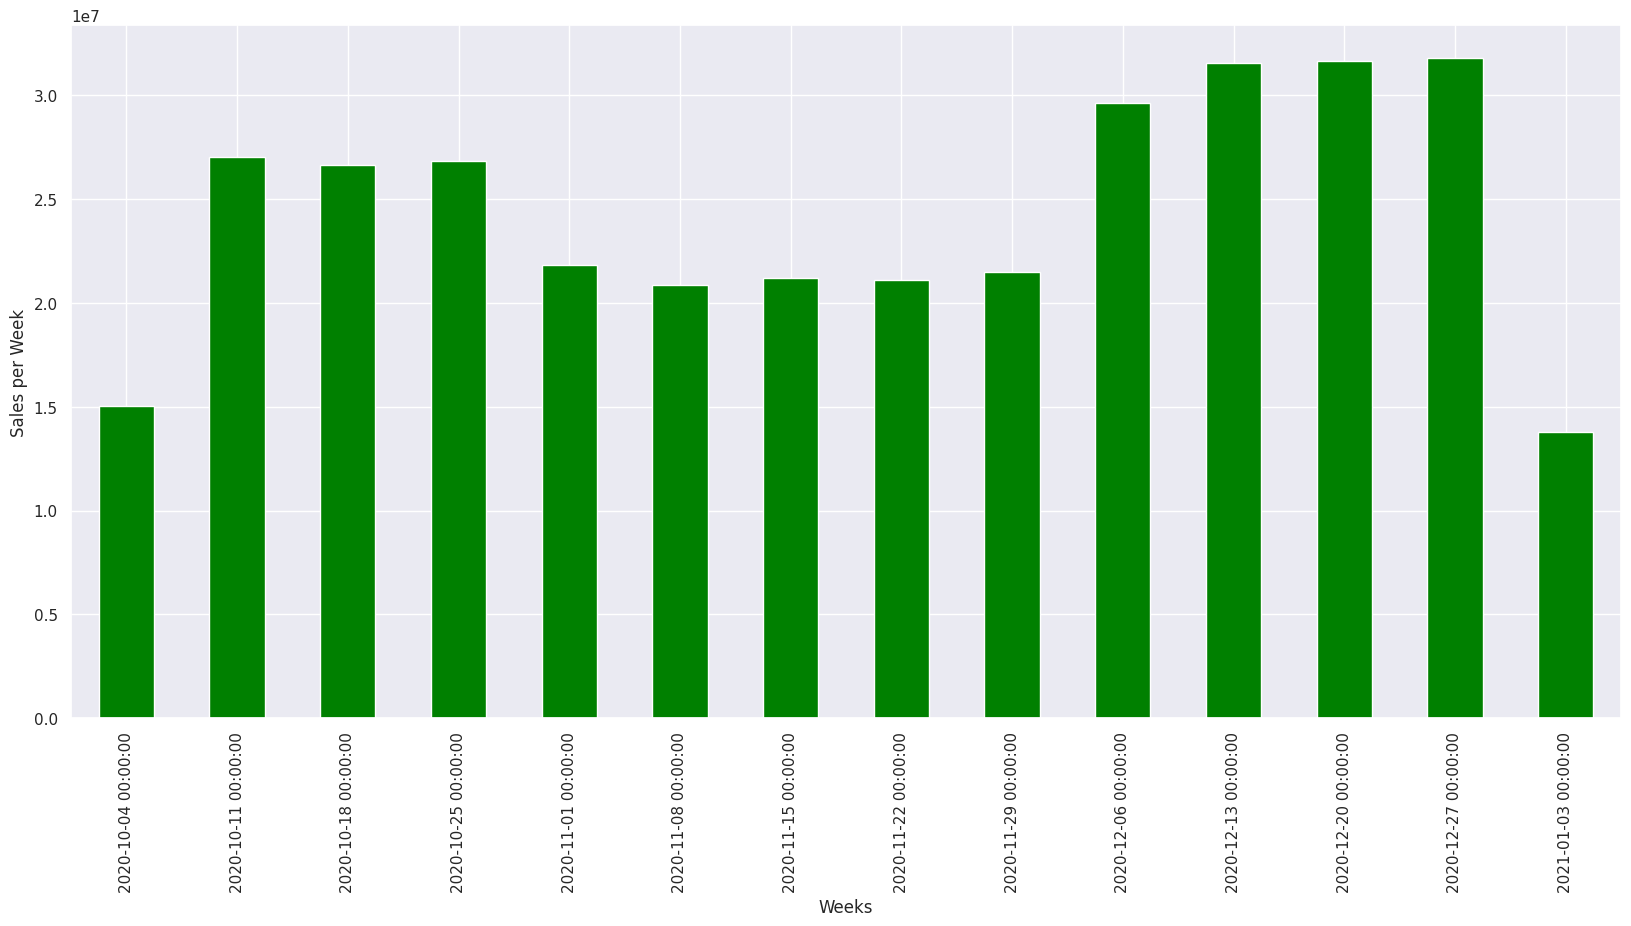

In [ ]:
weekly_data.plot(kind='bar', color='green')
plt.xlabel('Weeks')
plt.ylabel('Sales per Week')
plt.show()

In [ ]:
print(weekly_data.idxmax())
print(weekly_data.max())

2020-12-27 00:00:00
31770000


In [ ]:
print(weekly_data.idxmin())
print(weekly_data.min())

2021-01-03 00:00:00
13792500


In [ ]:
monthly_data=sales.resample('M',on='Date')['Sales'].sum()
monthly_data

,Sales
Date,
2020-10-31,114290000
2020-11-30,90682500
2020-12-31,135330000


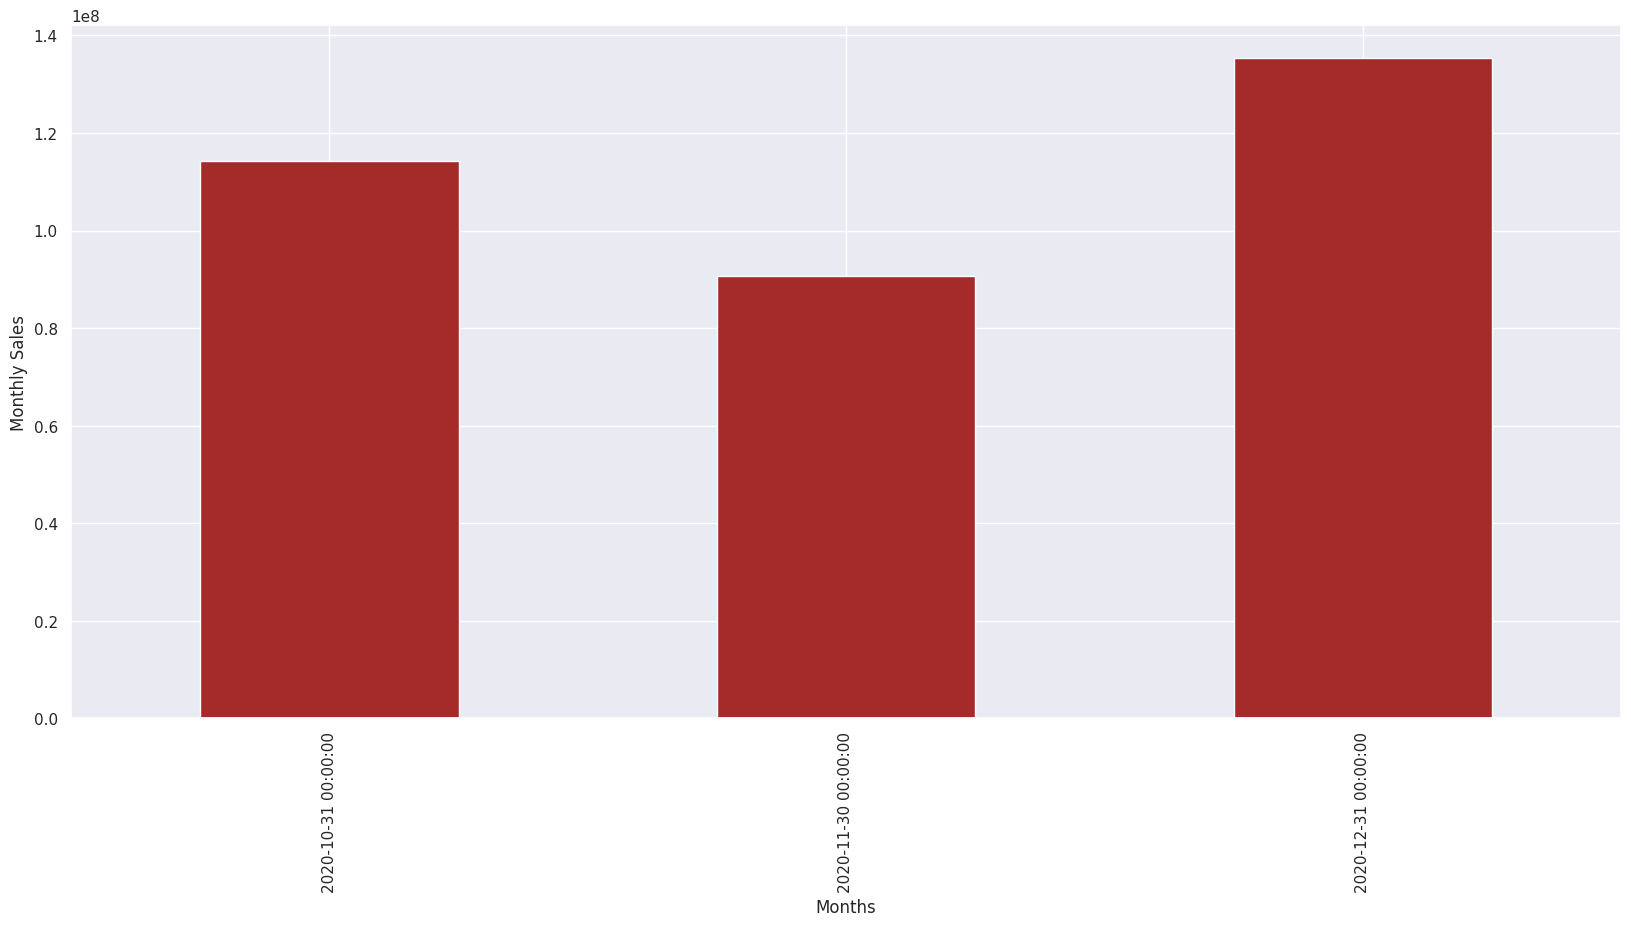

In [ ]:
monthly_data.plot(kind='bar', color='brown')
plt.xlabel('Months')
plt.ylabel('Monthly Sales')
plt.show()

In [ ]:
print(monthly_data.idxmax())
print(monthly_data.max())

2020-12-31 00:00:00
135330000


In [ ]:
quarterly_data=sales.resample('Q',on='Date')['Sales'].sum()
quarterly_data

,Sales
Date,
2020-12-31,340302500


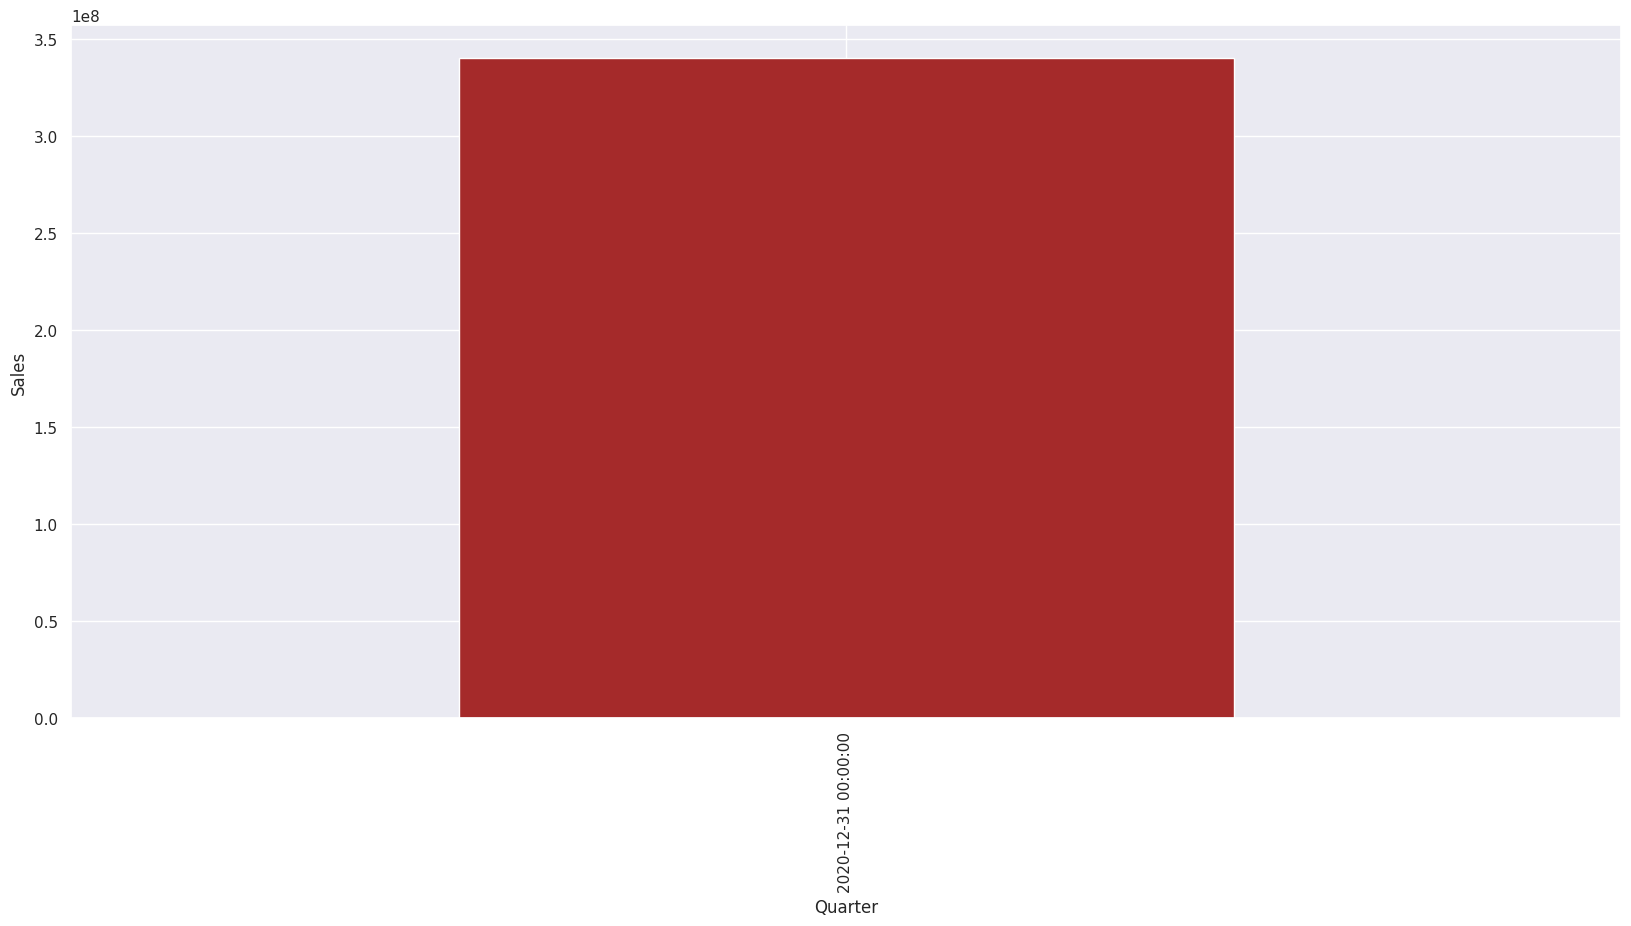

In [ ]:
quarterly_data.plot(kind='bar', color='brown')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.show()

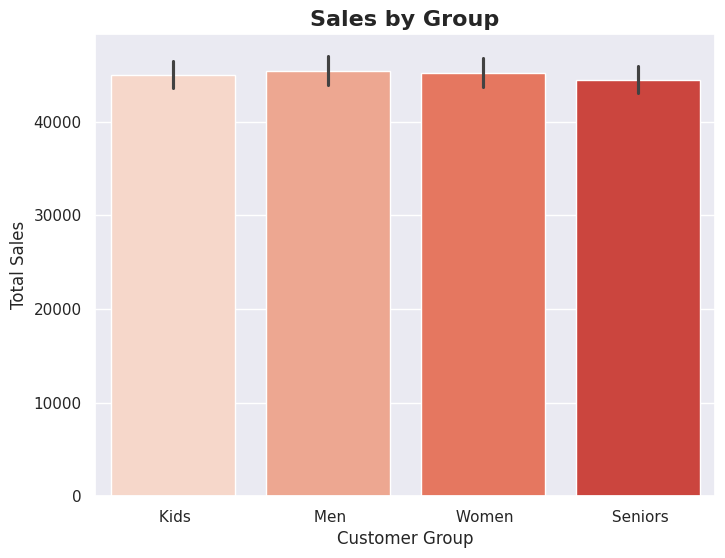

In [ ]:
plt.figure(figsize=(8,6))
custom_palette=sns.color_palette('Reds',5)

sns.barplot(x=sales['Group'],y=sales['Sales'], data=sales, palette=custom_palette)
plt.title('Sales by Group', fontsize=16, fontweight='bold')
plt.xlabel('Customer Group',fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.show()

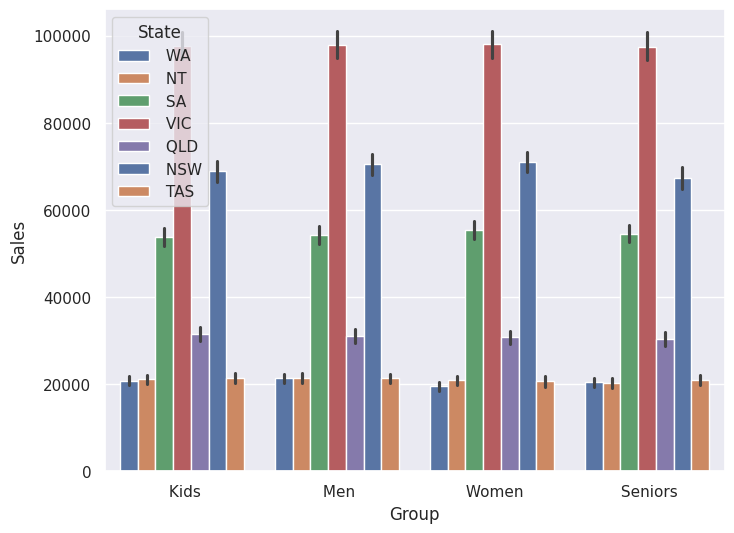

In [ ]:
plt.figure(figsize=(8,6))

cus_palette=sns.color_palette('deep',5)
sns.barplot(x=sales['Group'],y=sales['Sales'],hue='State',palette=cus_palette, data=sales)
plt.show()

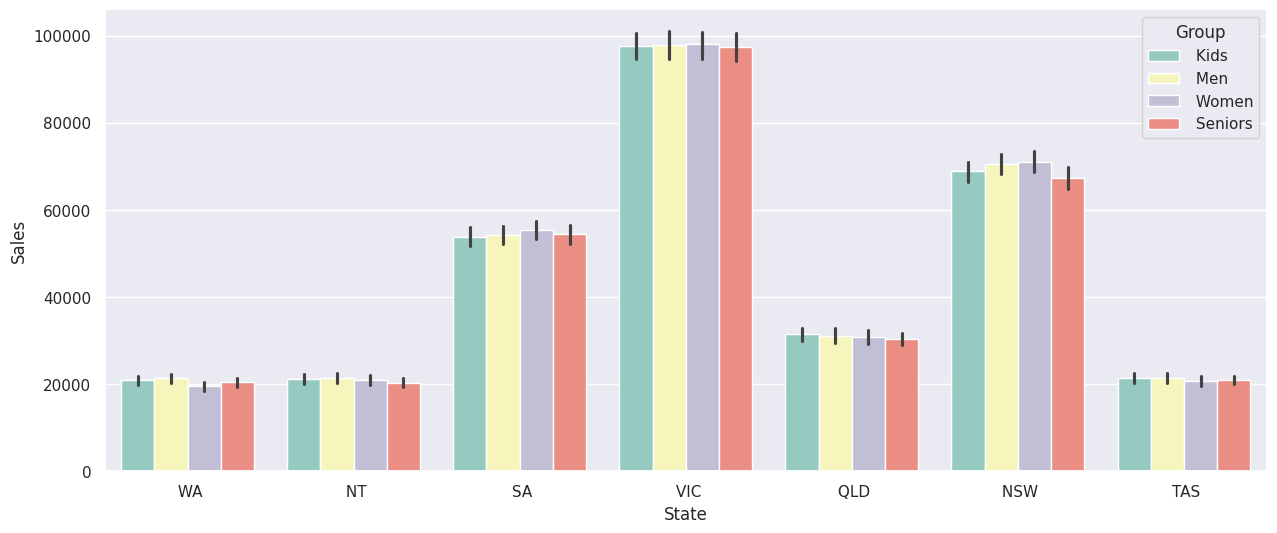

In [ ]:
plt.figure(figsize=(15,6))

cus_palette=sns.color_palette('deep',5)
sns.barplot(x=sales['State'],y=sales['Sales'],hue='Group',palette='Set3', data=sales)
plt.show()

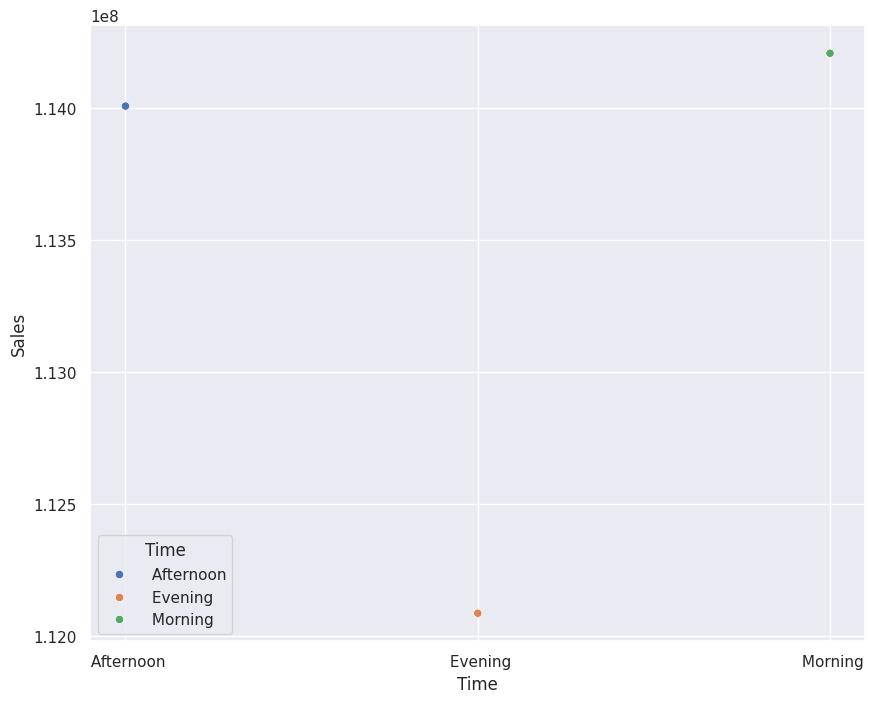

In [ ]:
plt.figure(figsize=(10,8))
time_of_day=sales.groupby(by='Time',axis='index').sum(numeric_only=True)
sns.scatterplot(x='Time',y='Sales',data=time_of_day,hue='Time')
plt.show()

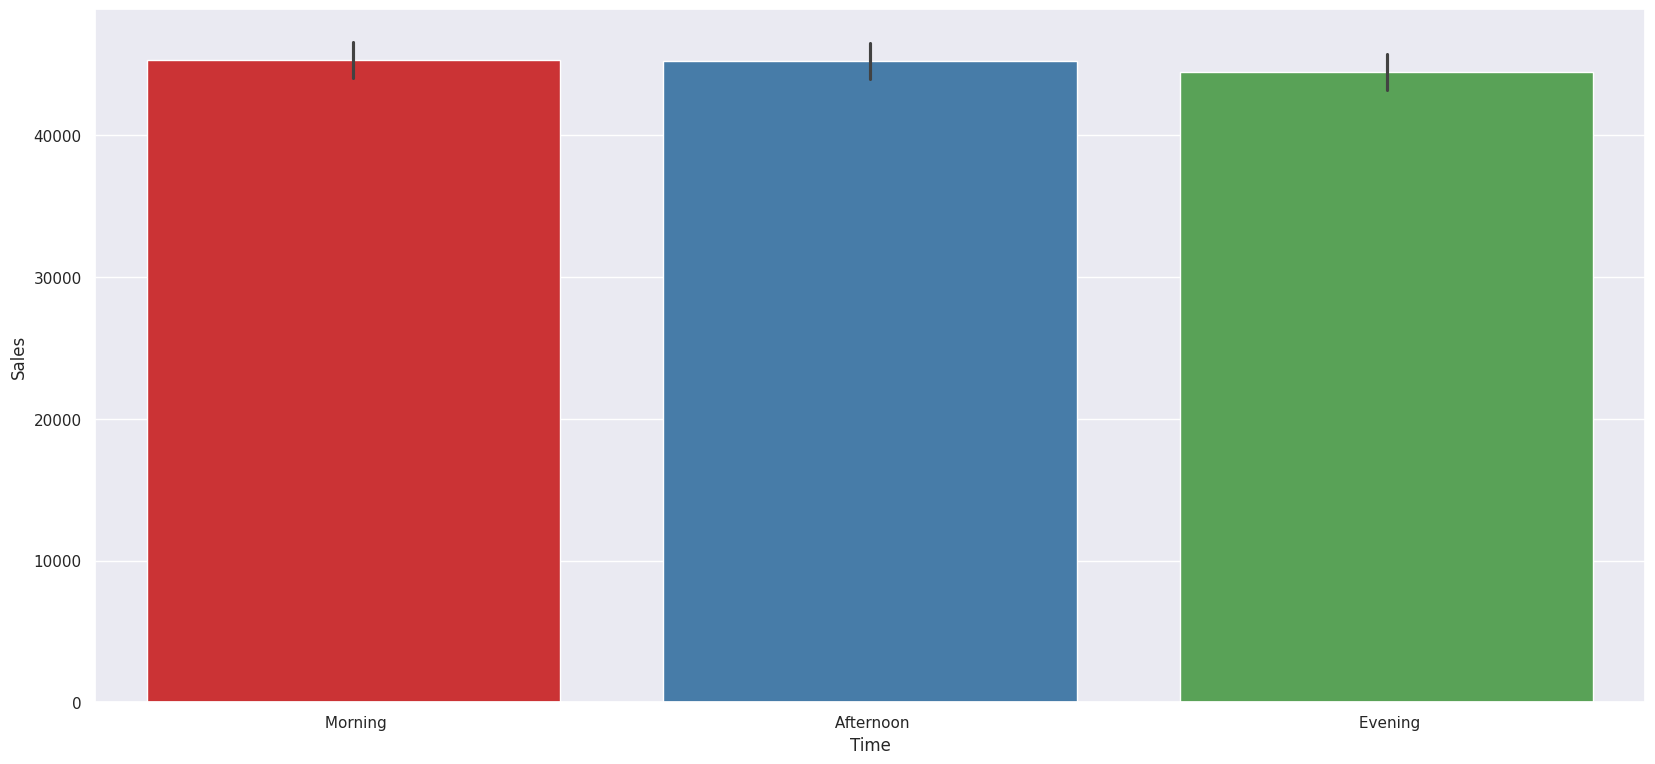

In [ ]:
sns.barplot(x=sales['Time'], y=sales['Sales'], palette='Set1')
plt.show()

Seaborn helps us to plot more than 2 dimensions so far an in-depth analysis and higher dimensional statistical plots we will opt for seaborn over 2D plotting package matplotlib.

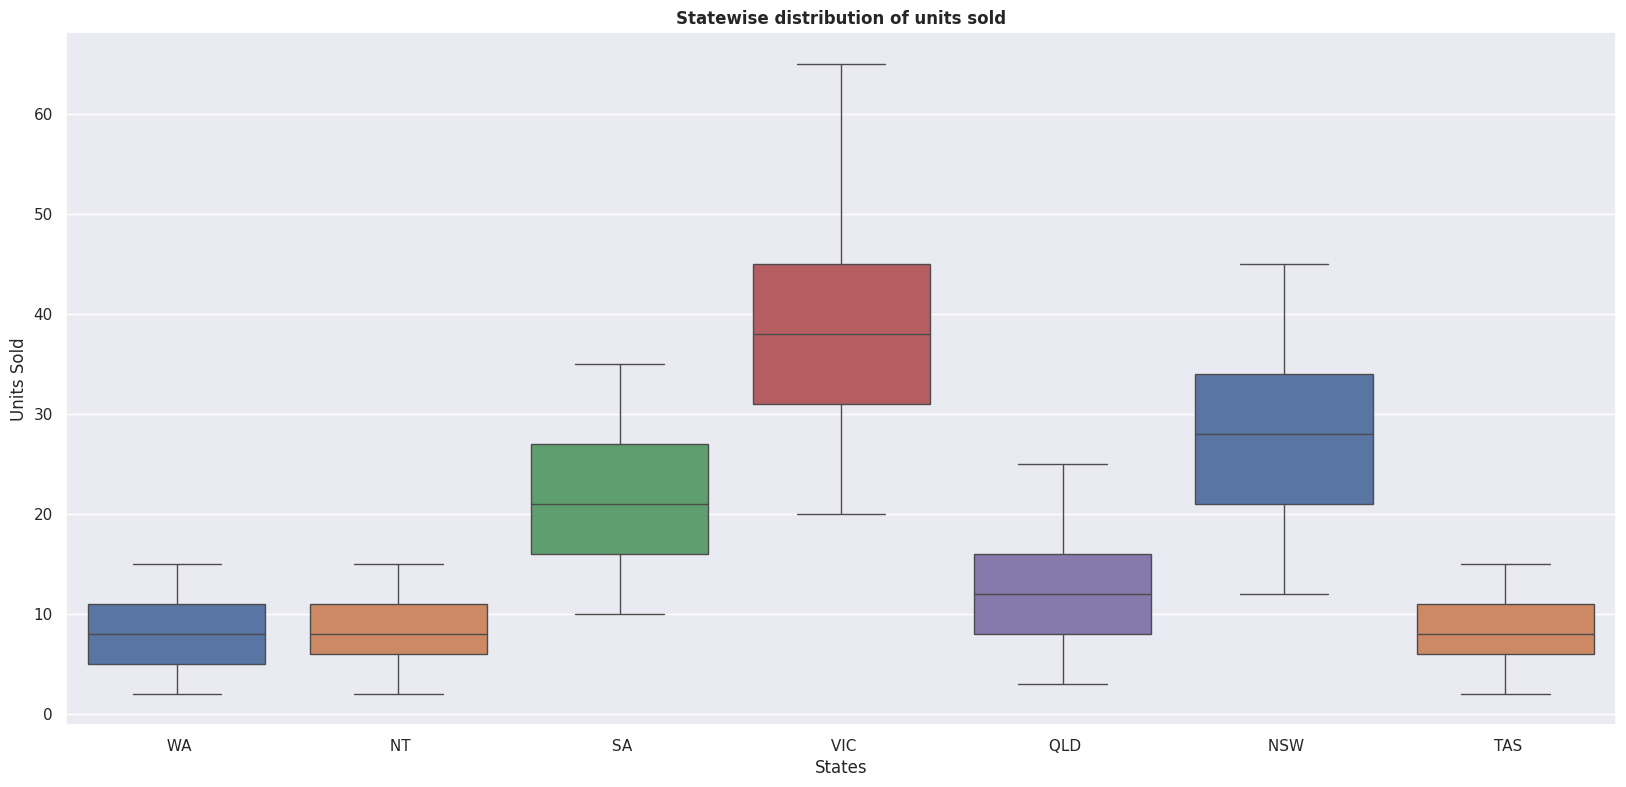

In [ ]:
sns.boxplot(x='State',y='Unit',data=sales,palette=cus_palette)
plt.title('Statewise distribution of units sold',fontsize=12,fontweight='bold')
plt.xlabel('States')
plt.ylabel('Units Sold',fontsize=12)
plt.show()

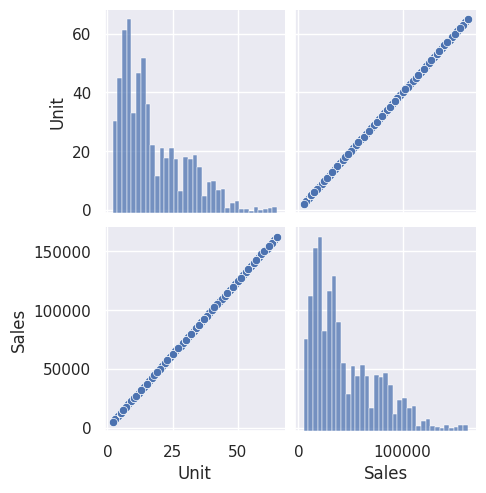

In [ ]:
sns.pairplot(data=sales)
plt.show()

In [ ]:
sales.corr(numeric_only=True)

,Unit,Sales
Unit,1.0,1.0
Sales,1.0,1.0


In summary, WA, NT, and TAS are the states with the lowest sales.  November sales have been historically low, and this should be anticipated in future years.  December has experienced the highest sales probably due to the holidays, while October has experienced unstable sales.  The majority of the sales come in the morning, while the company experiences the lowest sales in the evenings.  Men bring in the most sales, while seniors bring in the lowest sales.

In order for AAL to hike revenues in WA, NT, and TAS, the following course of action should be taken. Conquer the low sales month in November with clearance events.  Clearances should be targeting seniors since they tend to spend less on clothing.  Black Friday advertising can bring profits.  This can also pave the way towards selling newer clothing in December, which is when sales are higher.  The newer merchandise should target men, because they spend more at AAL.